In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt  
path="/Users/zhangyuanzhuo/"
import os
os.chdir(path)

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data = data.dropna()
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [5]:
split_1 = int(len(data) * .6)
split_2 = int(len(data) * .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [6]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [7]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [8]:
model1 = sm.OLS(y_in, X_in).fit()
in_pred = model1.predict(X_in)
out_pred = model1.predict(X_out)

# 4.) Recreate the graph fro your model

In [9]:
import matplotlib.pyplot as plt

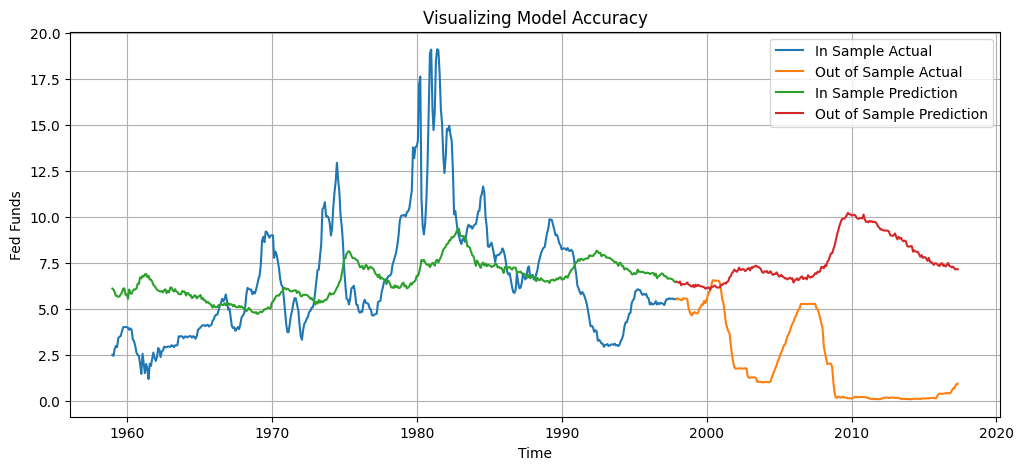

In [10]:
plt.figure(figsize = (12,5))


plt.plot(y_in,label='In Sample Actual')
plt.plot(y_out,label='Out of Sample Actual')
plt.plot(in_pred,label='In Sample Prediction')
plt.plot(out_pred,label='Out of Sample Prediction')


plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend()
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
in_mse_1 = mean_squared_error(y_in,in_pred)
out_mse_1 = mean_squared_error(y_out,out_pred)

In [13]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168643
Outsample MSE :  40.36082783566727


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [14]:
from sklearn.preprocessing import PolynomialFeatures

DEGREE:  1
Insample MSE :  10.071422013168641
Outsample MSE :  40.360827835667884


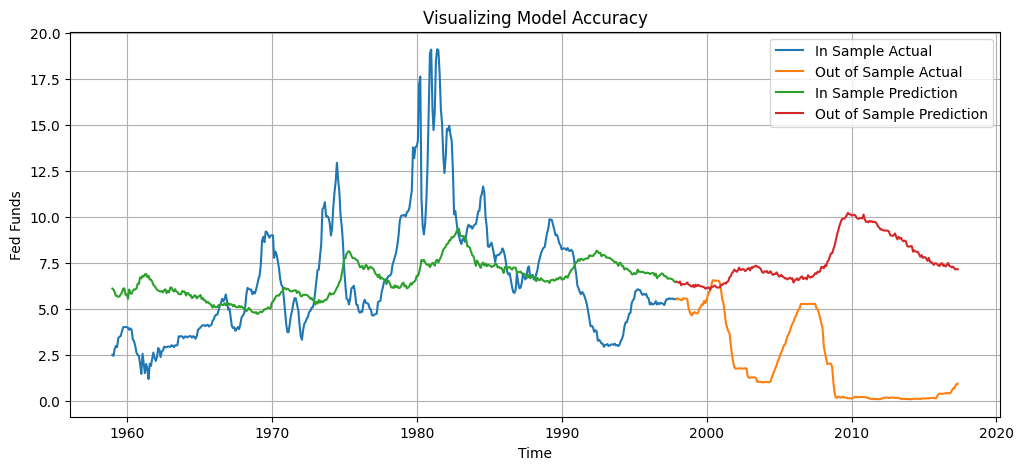

DEGREE:  2
Insample MSE :  3.863477139276068
Outsample MSE :  481.4465099288752


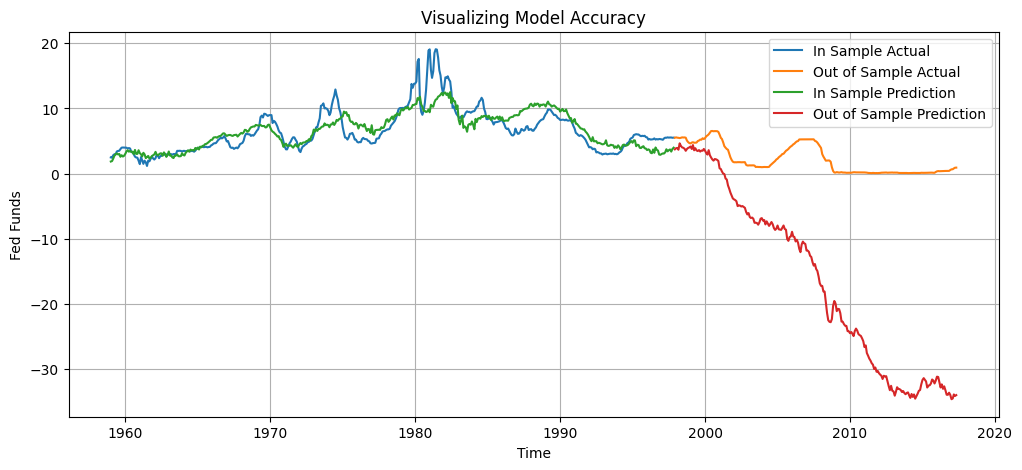

DEGREE:  3
Insample MSE :  1.8723636267309247
Outsample MSE :  371.7678694269212


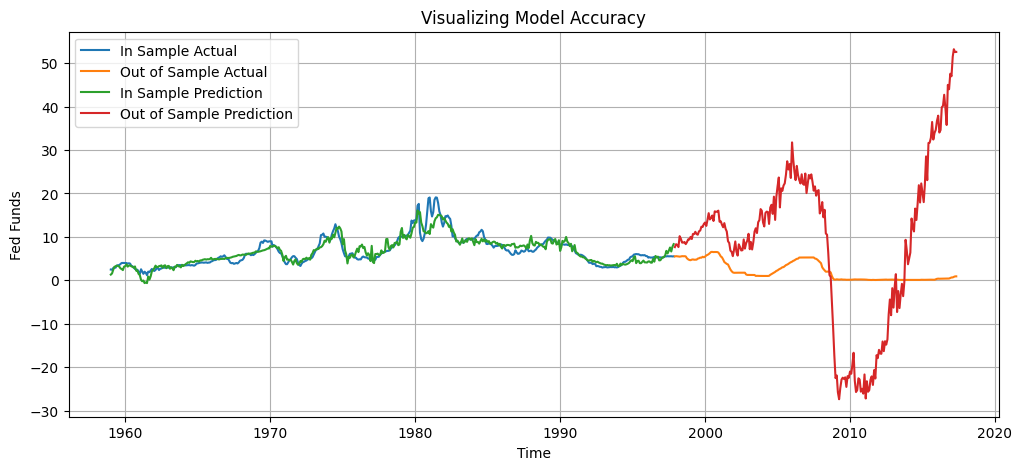

In [15]:
max_degrees = 3
for degrees in range(1,max_degrees+1):
    print('DEGREE: ',degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out)
    
    model1 = sm.OLS(y_in, X_in_poly).fit()
    
    in_pred = model1.predict(X_in_poly)
    out_pred = model1.predict(X_out_poly)
    in_pred = pd.DataFrame(in_pred, index=y_in.index)
    out_pred = pd.DataFrame(out_pred, index=y_out.index)
    
    in_mse_1 = mean_squared_error(y_in,in_pred)
    out_mse_1 = mean_squared_error(y_out,out_pred)
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)
    
    plt.figure(figsize = (12,5))
    
    plt.plot(y_in,label='In Sample Actual')
    plt.plot(y_out,label='Out of Sample Actual')
    plt.plot(in_pred,label='In Sample Prediction')
    plt.plot(out_pred,label='Out of Sample Prediction')


    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend()
    plt.grid()
    plt.show()
    

# 7.) State your observations :

As degree increases, the mse for in sample prediction decreases but mse for out of sample prediction increases. While increasing the degree of the polynomial leads to a better fit on the training data (lower insample MSE), it seems to result in poorer performance on the outsample data (higher outsample MSE) for DEGREE 2 and DEGREE 3. This suggests that a quadratic or cubic model might be too complex and overfitting the data. Therefore the original model with degree 1 is the best.